In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [25]:
train = pd.read_csv('../data/Train.csv')
test = pd.read_csv('../data/Test.csv')
sample_submission = pd.read_csv('../data/SampleSubmission.csv')

In [55]:
train.head()

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [56]:
test.head()

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic


In [57]:
sample_submission.head()

,ID,target
0,ID_01QM0NU,0
1,ID_024NJLZ,0
2,ID_02NOVWQ,0
3,ID_02VSP68,0
4,ID_02YB37K,0


In [58]:
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (12079, 14)
The shape of the test set is: (1202, 13)


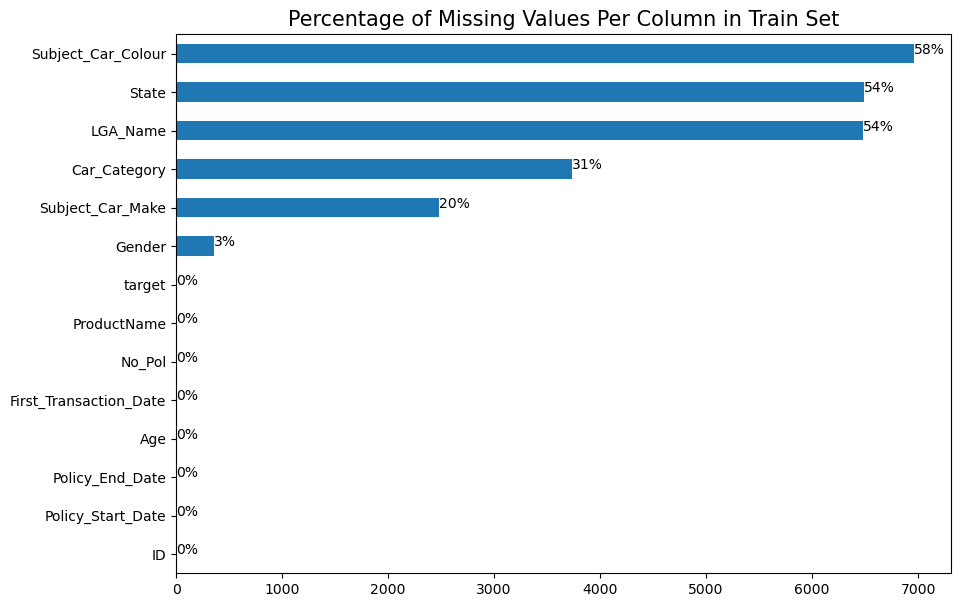

In [59]:
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [60]:
train[train['Age'] < 18]. count()

ID                        556
Policy_Start_Date         556
Policy_End_Date           556
Gender                    534
Age                       556
First_Transaction_Date    556
No_Pol                    556
Car_Category              356
Subject_Car_Colour        169
Subject_Car_Make          429
LGA_Name                  225
State                     225
ProductName               556
target                    556
dtype: int64

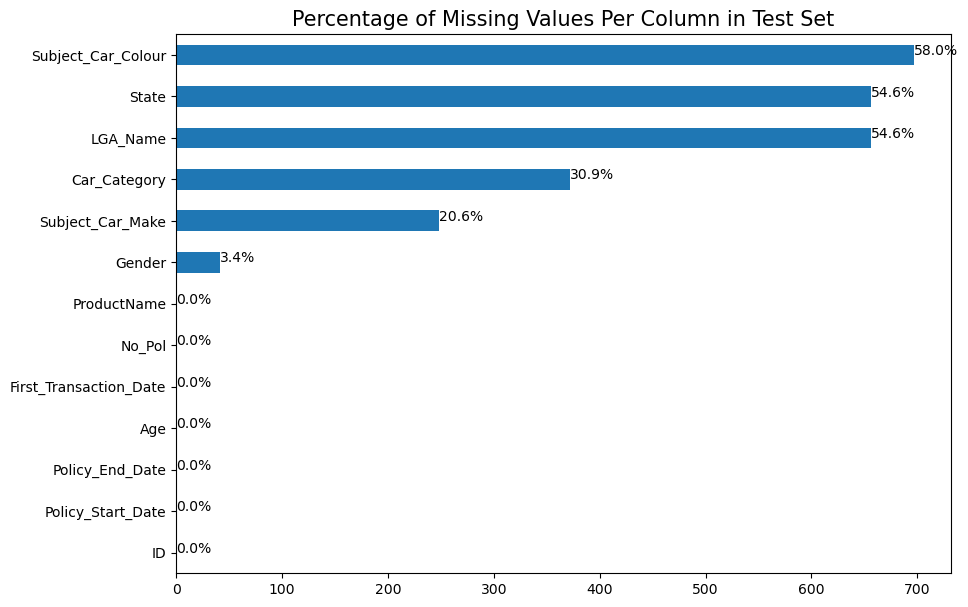

In [61]:
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

## Data Preprocessing

In [26]:
train['Policy_Start_Date'] = pd.to_datetime(train['Policy_Start_Date'])
train['Policy_End_Date'] = pd.to_datetime(train['Policy_End_Date'])
train['First_Transaction_Date'] = pd.to_datetime(train['First_Transaction_Date'])

test['Policy_Start_Date'] = pd.to_datetime(test['Policy_Start_Date'])
test['Policy_End_Date'] = pd.to_datetime(test['Policy_End_Date'])
test['First_Transaction_Date'] = pd.to_datetime(test['First_Transaction_Date'])

## Handle Missing Values

In [27]:
def front_fill_data(data, columns):
    for column in columns:
        data[column] = data[column].fillna(method='ffill')
    return data

front_fill_columns = ['Gender','Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State']

front_filled_train = front_fill_data(train, front_fill_columns)
front_filled_test = front_fill_data(test, front_fill_columns)


In [64]:
front_filled_train.to_csv('../data/front_filled_train.csv', index=False)
front_filled_test.to_csv('../data/front_filled_test.csv', index=False)

In [65]:
train.head()

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Red,TOYOTA,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Saloon,Red,TOYOTA,Lagos,Lagos,Muuve,1


In [66]:
test.head()

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,Ford,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,Black,TOYOTA,Wuse 11,Abuja,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,Female,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic


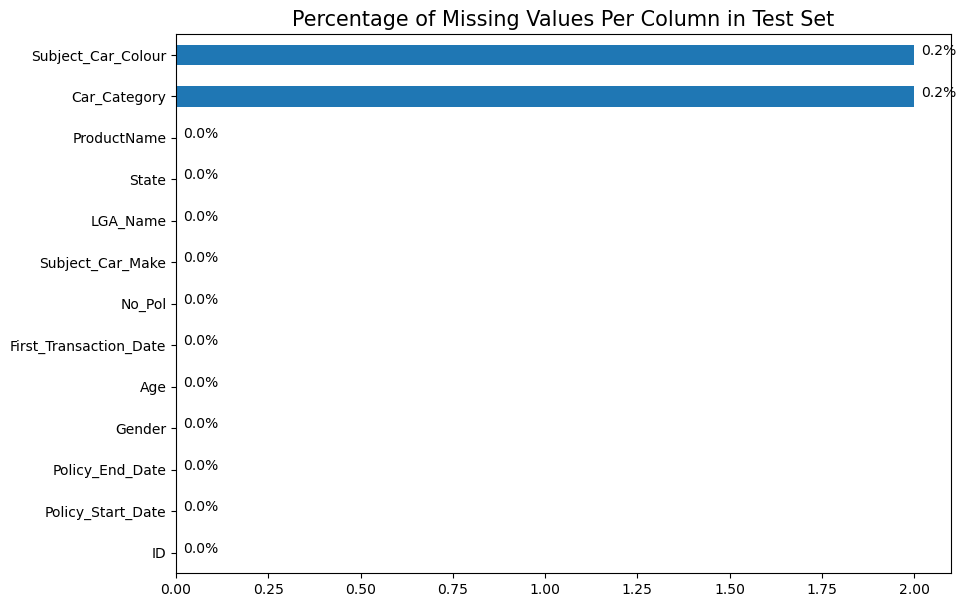

In [28]:
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [29]:
def clean_age(age):
    if age < 18:
        return np.nan  
    return age

In [30]:
train['Age'] = train['Age'].apply(clean_age)
test['Age'] = test['Age'].apply(clean_age)

age_median = train['Age'].mean()
age_median_t = train['Age'].mean()
train['Age'].fillna(age_median, inplace=True)
test['Age'].fillna(age_median_t, inplace=True)

## Feature Engineering

In [31]:
train['Policy_Start_Date'] = pd.to_datetime(train['Policy_Start_Date'])
train['Policy_End_Date'] = pd.to_datetime(train['Policy_End_Date'])
train['First_Transaction_Date'] = pd.to_datetime(train['First_Transaction_Date'])

test['Policy_Start_Date'] = pd.to_datetime(test['Policy_Start_Date'])
test['Policy_End_Date'] = pd.to_datetime(test['Policy_End_Date'])
test['First_Transaction_Date'] = pd.to_datetime(test['First_Transaction_Date'])

In [32]:
train['Policy_Duration'] = (train['Policy_End_Date'] - train['Policy_Start_Date']).dt.days
train['Customer_Tenure'] = (train['Policy_Start_Date'] - train['First_Transaction_Date']).dt.days
test['Policy_Duration'] = (test['Policy_End_Date'] - test['Policy_Start_Date']).dt.days
test['Customer_Tenure'] = (test['Policy_Start_Date'] - test['First_Transaction_Date']).dt.days

today = pd.Timestamp.today()
train['Recency'] = (today - train['Policy_End_Date']).dt.days
test['Recency'] = (today - test['Policy_End_Date']).dt.days

## Encoding Categorical Values

In [33]:

categorical_columns = ['Gender', 'Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_train = encoder.fit_transform(train[categorical_columns])
encoded_test = encoder.transform(test[categorical_columns])

encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_columns))

train = train.drop(columns=categorical_columns).reset_index(drop=True)
test = test.drop(columns=categorical_columns).reset_index(drop=True)

train = pd.concat([train, encoded_train_df], axis=1)
test = pd.concat([test, encoded_test_df], axis=1)

In [14]:
train.shape

(12079, 532)

In [34]:
X = train.drop(columns=['ID', 'target', 'Policy_Start_Date', 'Policy_End_Date', 'First_Transaction_Date'])
y = train['target']
X_test = test.drop(columns=['ID', 'Policy_Start_Date', 'Policy_End_Date', 'First_Transaction_Date'])

In [35]:
scaler = StandardScaler()
numerical_columns = ['Age', 'No_Pol', 'Policy_Duration', 'Customer_Tenure', 'Recency']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [75]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [76]:
train_predictions = model.predict(X)

f1 = f1_score(y, train_predictions)
precision = precision_score(y, train_predictions)
recall = recall_score(y, train_predictions)
conf_matrix = confusion_matrix(y, train_predictions)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.8870
Precision: 0.9817
Recall: 0.8089
Confusion Matrix:
[[10602    22]
 [  278  1177]]


In [77]:
feature_importances = pd.DataFrame(
    model.feature_importances_,
    index=X.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

feature_importances

,importance
Recency,0.155308
Age,0.109917
ProductName_CarSafe,0.066498
Policy_Duration,0.047373
ProductName_Muuve,0.023078
...,...
LGA_Name_ENUGU SOUTH,0.000000
LGA_Name_EMENE,0.000000
LGA_Name_EFFURUN,0.000000
LGA_Name_Chanchaga,0.000000


In [78]:
test_predictions = model.predict(X_test)

In [79]:
test_predictions = model.predict(X_test)
pd.DataFrame(test_predictions).value_counts()

0
0    1107
1      95
Name: count, dtype: int64

In [80]:
test_probabilities = model.predict_proba(X_test)

In [89]:
sample_submission['target'] = test_predictions
sample_submission.to_csv('submission.csv', index=False)

In [81]:
claim_probabilities = test_probabilities[:, 1]

In [ ]:
test_predictions = (claim_probabilities >= 0.5).astype(int)

In [86]:
pd.DataFrame(test_predictions).value_counts()

0
0    1084
1     118
Name: count, dtype: int64

In [84]:
# Update the submission file
sample_submission['target'] = test_predictions
sample_submission.to_csv('submission.csv', index=False)

In [438]:
import joblib

joblib.dump(model, 'claim_prediction_model.pkl')
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']